<a href="https://colab.research.google.com/github/ark1st/2020_AI/blob/master/activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decord_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decord_review



1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
def Vectorize_Sequence(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_train = Vectorize_Sequence(train_data)
x_test = Vectorize_Sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras import models
from keras import layers

activation_list = ['relu', 'sigmoid', 'tanh', 'softmax']

In [7]:
history_dict_list=[]
result_list =[]
for i in activation_list:
    print(i)
    model = models.Sequential()
    model.add(layers.Dense(16, activation = i, input_shape = (10000,)))
    model.add(layers.Dense(16, activation=i))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #트레인, 테스트 셋 생성
    x_val = x_train[:10000]
    partial_x_train = x_train[10000:]
    y_val = y_train[:10000]
    partial_y_train = y_train[10000:]
    
    #모델 컴파일
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    
    #모델 훈련
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
    
    history_dict = history.history
    history_dict_list.append(history_dict) 
    results = model.evaluate(x_test, y_test)
    result_list.append(results)

    


relu
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.5364 - acc: 0.7893 - val_loss: 0.4039 - val_acc: 0.8654
Epoch 2/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.3273 - acc: 0.9013 - val_loss: 0.3249 - val_acc: 0.8807
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2409 - acc: 0.9270 - val_loss: 0.2915 - val_acc: 0.8900
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1899 - acc: 0.9421 - val_loss: 0.2795 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1561 - acc: 0.9514 - val_loss: 0.2926 - val_acc: 0.8829
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1267 - acc: 0.9645 - val_loss: 0.2935 - val_acc: 0.8836
Epoch 7/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1051 - acc: 0.9707 - val_loss: 0.30

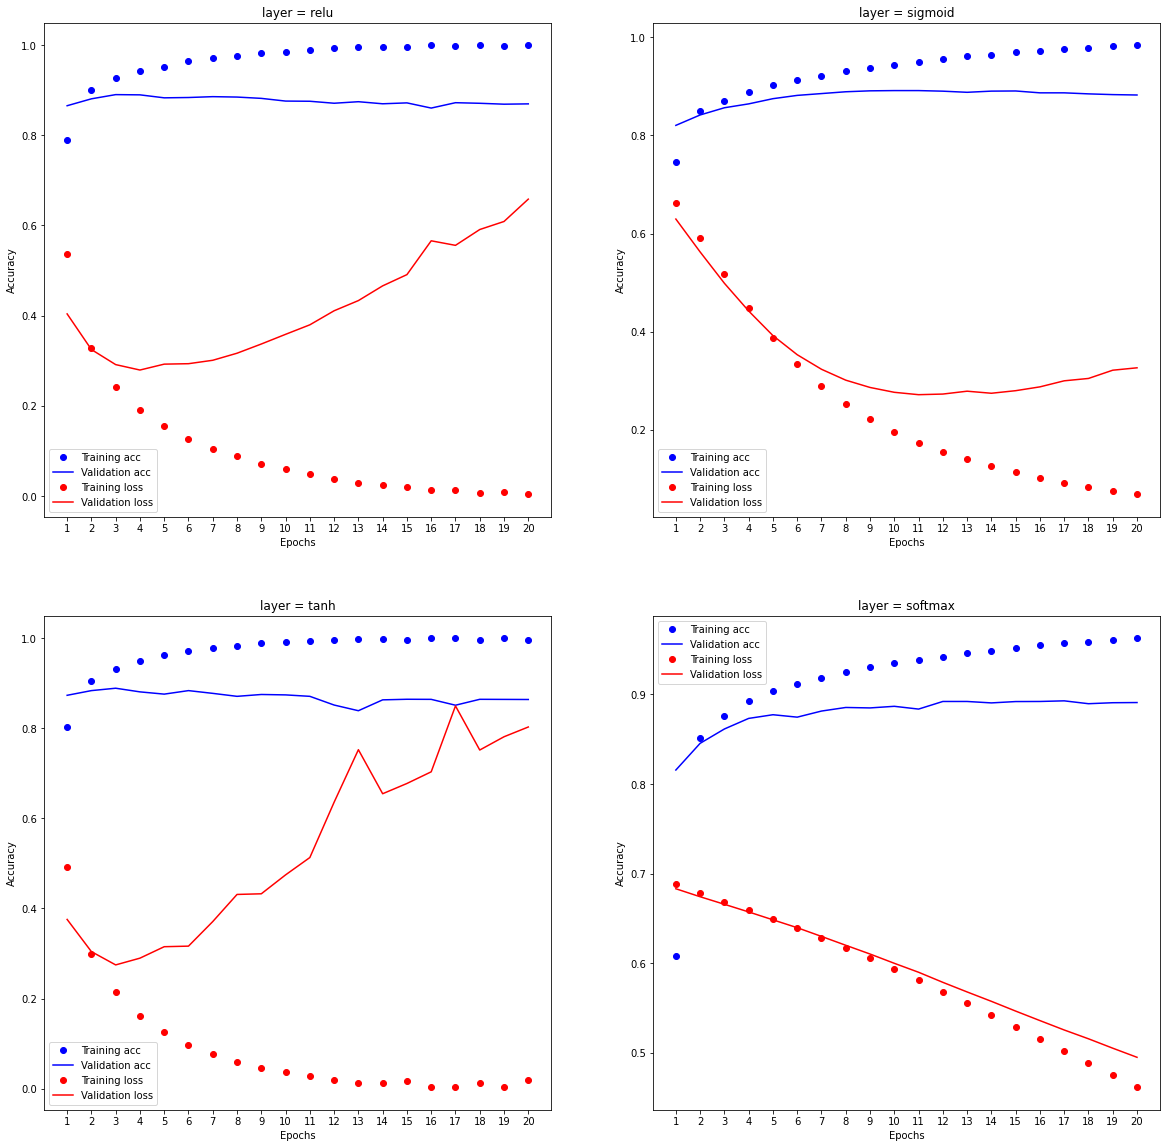

In [9]:
i=0
plt.figure(figsize=(20,20))
for history_dict in history_dict_list:
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
    
  epochs = range(1, len(loss) + 1)
    
  plt.subplot(2,2,i+1)   # 그래프를 초기화합니다
  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
    
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.plot(epochs, loss, 'ro', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('layer = ' +str(activation_list[i]))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.xticks([x for x in range(1,21)])
  plt.legend()
  i = i+1
plt.show()  




In [8]:
result_list

[[0.7025644607019425, 0.8537600040435791],
 [0.35659331537723543, 0.8718799948692322],
 [0.8990973813819886, 0.8445600271224976],
 [0.5001621111106872, 0.8841599822044373]]